# **Библиотека LightGBM**

# Описание библиотеки

LightGBM — это фреймворк, который предоставляет реализацию деревьев принятия решений с градиентным бустингом. Он создан группой исследователей и разработчиков Microsoft. LightGBM известен своей более высокой скоростью обучения, хорошей точностью с параметрами по умолчанию, параллельным и GPU обучением, малым использованием памяти и возможностью обработки больших датасетов, которые не всегда помещаются в ней.

Light GBM может быть быстрым, распределенным, высокопроизводительным алгоритмом градиентного форсирования, поддерживаемым деревом решений, используемым для ранжирования, классификации и множества других задач машинного обучения.

Платформа LightGBM поддерживает различные алгоритмы, включая GBT, GBDT, GBRT, GBM, MART и RF. LightGBM обладает многими преимуществами XGBoost, включая разреженную оптимизацию, параллельное обучение, множественные функции потерь, регуляризацию, пакетирование и раннюю остановку. 

Отличительной чертой является быстрота построения композиции. Например, используется следующий трюк для ускорения обучения: при построении вершины дерева вместо перебора по всем значениям признака производится перебор значений гистограммы этого признака. Таким образом, вместо $O(l)$ требуется $O(\#bins)$. Кроме того, в отличие от других библиотек, которые строят дерево по уровням, LightGBM использует стратегию best-firs, то есть на каждом шаге строит вершину, дающую наибольшее уменьшение функционала - ограничение на num_leaves получается смысленным.

Алгоритм LightGBM использует два новых метода: односторонняя выборка на основе градиента (GOSS) и объединение эксклюзивных функций (EFB), которые позволяют алгоритму работать быстрее при сохранении высокого уровня точности.

LightGBM работает в Linux, Windows и macOS и поддерживает C ++ , Python, R и C #.  Исходный код находится под лицензией MIT License и доступен на GitHub.

**Листовой рост для LightGBM**

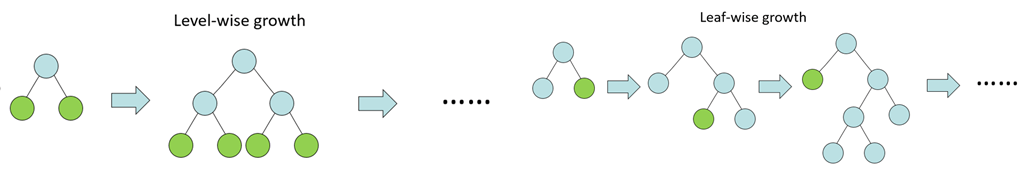

**Основные параметры**

objective – функционал, на который будет настраиваться композиция;

eta – темп (скорость) обучения;

num_iterations – число итераций бустинга.

Параметры, отвечающие за сложность деревьев:

  - max_depth – максимальная глубина каждого дерева;
  - max_leaves – максимальное число вершин в дереве;
  - gamma – порог на уменьшение функции ошибки при расщеплении в дереве;
  - min_data_in_leaf – минимальное число объектов в листе;
  - subsample – какую часть объектов обучения использовать для построения одного дерева;
  - colsample_bytree – какую часть признаков использовать для построения одного дерева.

Начинать настройку можно с самых главных параметров: eta и num_iterations. Обычно один из них фиксируют, а другой подбирают (например, фиксируют num_iterations и подбирают eta). Следующим по важности является max_depth.

**LGBMModel**

Класс $LGBMModel$ — это обертка для класса $Booster$, которая предоставляет подобный $scikit-learn API$ для обучения и прогнозирования в $LightGBM$. Он позволяет создать объект оценщика со списком параметров в качестве входных данных. Затем можно вызвать метод $fit()$ для обучения, передав ему тренировочные данные, и метод $predict()$ для предсказания.

Параметры, которые передаются в виде словаря аргументу params функции $train()$, теперь можно напрямую передать конструктору $LGBMModel$ для создания модели. $LGBMModel$ позволяет выполнять задачи как классификации, так и регрессии, указав цель $(objective)$ задачи.

**LGBMRegressor**

$LGBMRegressor$ — еще одна обертка-оценщик вокруг класса $Booster$, предоставляемая $Lightgbm$ и имеющая тот же $API$, что и у оценщиков $sklearn$. Как следует из названия, он предназначен для задач регрессии.

$LGBMRegressor$ почти такой же, как $LGBMModel$, с той лишь разницей, что он предназначен только для задач регрессии. Обратите внимание, что $LGBMRegressor$ предоставляет метод $score()$, который рассчитывает оценку R2, которая до сих пор получалась с использованием метрик $sklearn$.

**Ограничение взаимодействия показателей**

Когда lightgbm завершил обучение на датасете, отдельный узел в этих деревьях представляет некоторое условие, основанное на некотором значении показателя. Когда во время предсказания используется отдельное дерево, оно начинается с его корневого узла, происходит проверка условия конкретного показателя, указанного в данном узле, с соответствующим значением показателя из семпла. Решения принимаются на основе значений признаков из наблюдения и условий, представленных в дереве. Таким образом, мы идем по определенному пути, пока не достигнем листа дерева, где сможем сделать окончательный прогноз.

По умолчанию любой узел может быть связан с любым показателем в качестве условия. Этот процесс принятия окончательного решения путем прохождения узлов дерева, проверяя условие на соответствующих признаках, называется взаимодействием показателей, так как предиктор пришел к конкретному узлу после оценки условия предыдущего узла. Lightgbm позволяет определять ограничения на то, какой признак взаимодействует с каким. Можно предоставить список индексов, и указанные показатели будут взаимодействовать только друг с другом. Этим признакам не будет разрешено взаимодействовать с другими, и это ограничение будет применяться при создании деревьев в процессе обучения.

**Монотонные ограничения** 

Lightgbm позволяет указывать монотонные ограничения для модели, которые определяют, связан ли отдельный показатель с увеличением/уменьшением целевого значения, или не связан вовсе. Таким образом, есть возможность использовать монотонные значения -1, 0 и 1, тем самым заставляя модель устанавливать уменьшающуюся, нулевую и увеличивающуюся взаимосвязь показателя с целью. Можно предоставить список той же длины, что и количество признаков, указав 1, 0 или -1 для монотонной связи, используя параметр $monotone\_constraints$.

**Пользовательская функция цели/потерь**

Lightgbm также позволяет определить конкретно подходящую целевую функцию. Для этого нужно создать функцию, которая принимает список прогнозируемых и фактических меток в качестве входных данных и возвращает первую и вторую производные функции потерь, вычисленные с использованием предсказанных и фактических значений. Далее мы можем передать параметру $objective$ оценщика определенную функцию цели/потерь. В случае использования метода $train()$ нужно предоставить ее через параметр $fobj$.

**Пользовательская функция оценки**

Lightgbm позволяет определять собственную оценочную метрику, если нет желания использовать метрики, предоставленные фреймворком. Для этого надо написать функцию, которая принимает на вход список предсказаний и фактических целевых значений. Она будет возвращать строку, определяющую название метрики, результат ее расчета и логическое значение, выражающее, стоит ли стремится к максимизации данной метрики или к ее минимизации. В случае, когда чем выше значение метрики, тем лучше, должно быть возвращено True, иначе — False.

Нужно указать ссылку на эту функцию в параметре $feval$, если используется метод $train()$ для разработки оценщика. При передаче в $fit()$ нужно присвоить данную ссылку параметру $eval\_metric$.

**Функции обратного вызова**

Lightgbm предоставляет пользователям список функций обратного вызова для разных целей, которые выполняются после каждой итерации обучения. Ниже приведен список доступных колбэков:

  - early\_stopping(stopping_rounds) — эта функция обратного вызова принимает целое число, указывающее, следует ли останавливать обучение, если результаты расчета метрики на последнем оценочном датасете не улучшаются на протяжении указанного числа итераций.
  - print_evaluation(period, show_stdv) — данный колбэк принимает целочисленные значения, определяющие, как часто должны выводиться результаты оценки. Полученные значения оценочной метрики печатаются через указанное число итераций.
  - record_evaluation(eval_result) — эта функция получает на вход словарь, в котором будут записаны результаты оценки.
  - reset_parameter() — данная функция обратного вызова позволяет нам сбрасывать скорость обучения после каждой итерации. Она принимает массив, размер которого совпадает с их количеством, или функцию, возвращающую новую скорость обучения для каждой итерации.

Параметр $callbacks$ методов $train()$ и $fit()$ принимает список функций обратного вызова.


**Преимущества LightGBM**

  - Быстрая скорость обучения и высокая эффективность: легкий GBM использует алгоритм на основе гистограммы, то есть он объединяет непрерывные значения признаков в дискретные ячейки, которые ускоряют процедуру обучения.
  - Более низкое использование памяти: заменяет непрерывные значения на дискретные ячейки, что приводит к снижению использования памяти.
  - Лучшая точность, чем у любого другого алгоритма усиления: он создает гораздо более сложные деревья, следуя подходу с разбивкой по листам, а не по уровням, что является основным фактором в достижении более высокой точности. Однако иногда это может привести к переоснащению, которого можно избежать, установив параметр max_depth.
  - Совместимость с большими наборами данных: он способен одинаково хорошо работать с большими наборами данных при значительном сокращении времени обучения по сравнению с XGBOOST.


**Структурные различия LightGBM и XGBoost**

LightGBM использует новую технику односторонней выборки на основе градиента (GOSS) для фильтрации экземпляров данных для нахождения значения разделения, в то время как XGBoost использует предварительно отсортированный алгоритм и алгоритм на основе гистограммы для вычисления наилучшего разделения. Здесь примерами являются наблюдения / образцы.

Проще говоря, алгоритм на основе гистограммы разбивает все точки данных для объекта на дискретные элементы и использует эти элементы для поиска значения разделения гистограммы. Несмотря на то, что он эффективнее, чем предварительно отсортированный алгоритм в скорости обучения, который перечисляет все возможные точки разделения на предварительно отсортированных значениях характеристик, он все еще отстает от GOSS с точки зрения скорости.

**Односторонняя выборка на основе градиента (GOSS)**

GOSS (односторонняя выборка на основе градиента) - это новый метод выборки, который уменьшает выборки на основе градиентов. Как мы знаем, случаи с небольшими градиентами хорошо обучены (небольшая ошибка обучения), а случаи с большими градиентами недоучены. Наивный подход к даунсамплингу заключается в отбрасывании экземпляров с небольшими градиентами, фокусируясь исключительно на экземплярах с большими градиентами, но это изменило бы распределение данных. В двух словах, GOSS сохраняет экземпляры с большими градиентами, выполняя случайную выборку на экземплярах с небольшими градиентами.

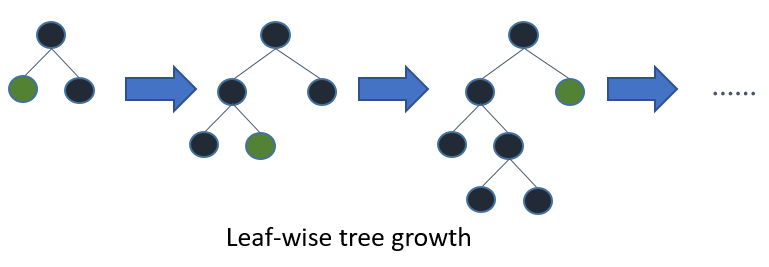

**Набор эксклюзивных функций (EFB)**

Exclusive Feature Bundling (EFB) - это метод почти без потерь для уменьшения количества эффективных функций. В разреженном пространстве функций многие функции почти исключительны, что означает, что они редко принимают ненулевые значения одновременно. Функции с горячим кодированием - прекрасный пример эксклюзивных функций. EFB объединяет эти функции, уменьшая размерность для повышения эффективности при сохранении высокого уровня точности. Объединение эксклюзивных функций в одну функцию называется пакетом эксклюзивных функций.


# Примеры применения

LightGBM как - библиотека градиентного бустинга, соответственно, сферы ее применения ограничены применением градиентного бустинга, о котором как раз целесообразно сказать.

В стандартных задачах (все кроме картинок и аудио, а также сильно разреженных данных), GBM очень часто является самым эффективным алгоритмом (не считая stacking-а и верхнеуровневых ансамблей, где GBM почти всегда является неотъемлемой их частью). При этом существуют адаптации GBM под Reinforcement Learning (Minecraft, ICML 2016), а алгоритм Виола-Джонса, до сих пор используемый в компьютерном зрении, основан на Adaboost.



## Пример применения библиотеки

**Искусственные данные**

Сгенерируем искусственный набор данных, содержащий 1000 объектов, 2 признака и 2 класса. Разобьем их случайным образом, 30% данных определим в тестовую часть.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_surface(X, y, clf):
    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

###LightGBM

**Установка LightGBM**

Попробуем классифицировать данные с помощью LightGBM, который для начала необходимо установить.

In [61]:
! pip install lightgbm

**Классификация данных**

Переходим к классификации данных с помощью LGBMClassifier, который необходимо импортировать.

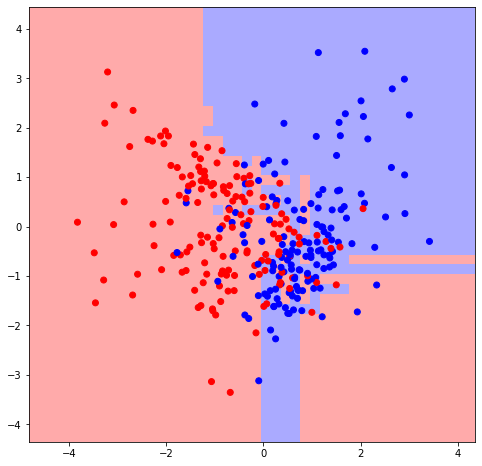

In [62]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=300)
clf.fit(X_train, y_train)
plot_surface(X_test, y_test, clf)

**Оценка классификации**

Оценим работу классификатора методом roc_auc_score (площадь под кривой ошибки).

In [63]:
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

0.8244444444444444


**Оптимизация количества деревьев**

Попробуем оптимизировать количество деревьев, перебрав различные варианты и оценив классификацию тем же методом.

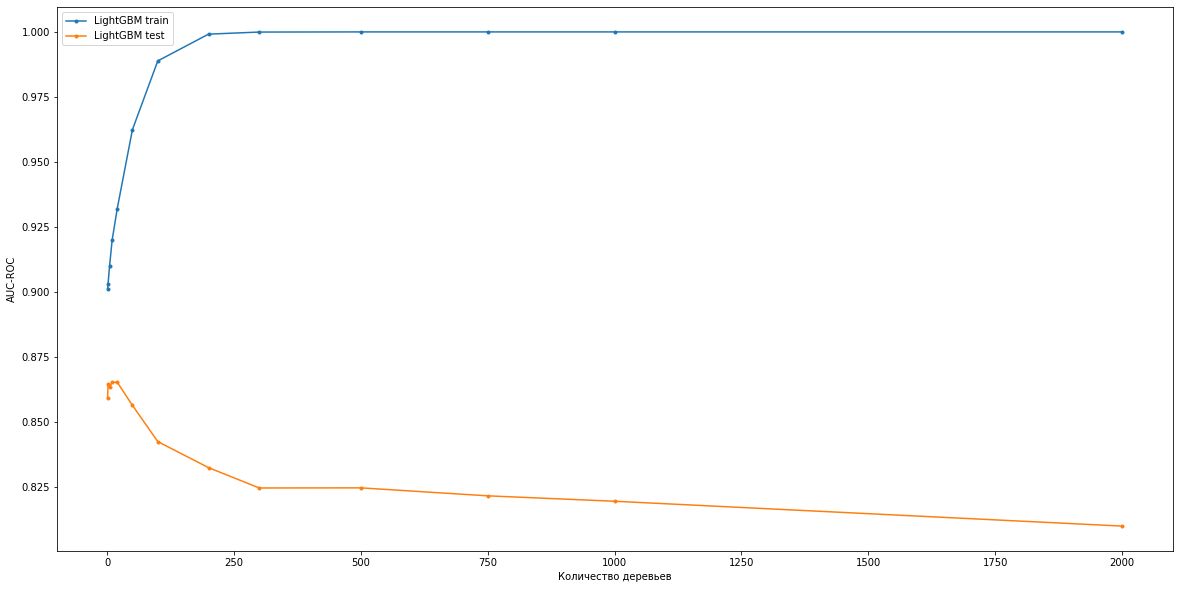

In [64]:
n_trees = [1, 2, 5, 10, 20, 50, 100, 200, 300, 500, 750, 1000, 2000]
quals_train_lgb = []
quals_test_lgb = []

for n in n_trees:
    lgb = LGBMClassifier(n_estimators=n)
    lgb.fit(X_train, y_train)
    q_train_lgb = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1])
    q_test_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])
    
    quals_train_lgb.append(q_train_lgb)
    quals_test_lgb.append(q_test_lgb)

plt.figure(figsize=(20, 10))
plt.plot(n_trees, quals_train_lgb, marker='.', label='LightGBM train')
plt.plot(n_trees, quals_test_lgb, marker='.', label='LightGBM test')
plt.xlabel('Количество деревьев')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

Заметно, что на тренировочных данных алгоритм учится достаточно быстро. На тестовой части выборки алгоритм достаточно быстро достигает хорошего качества и уже на небольшом количестве деревьев начинает его терять, но в целом остается достаточно стабильным.

**Подбор глубины деревьев**

Попробуем изменять глубину деревьев, не меняя их количество. Тем же методом оценим результаты.

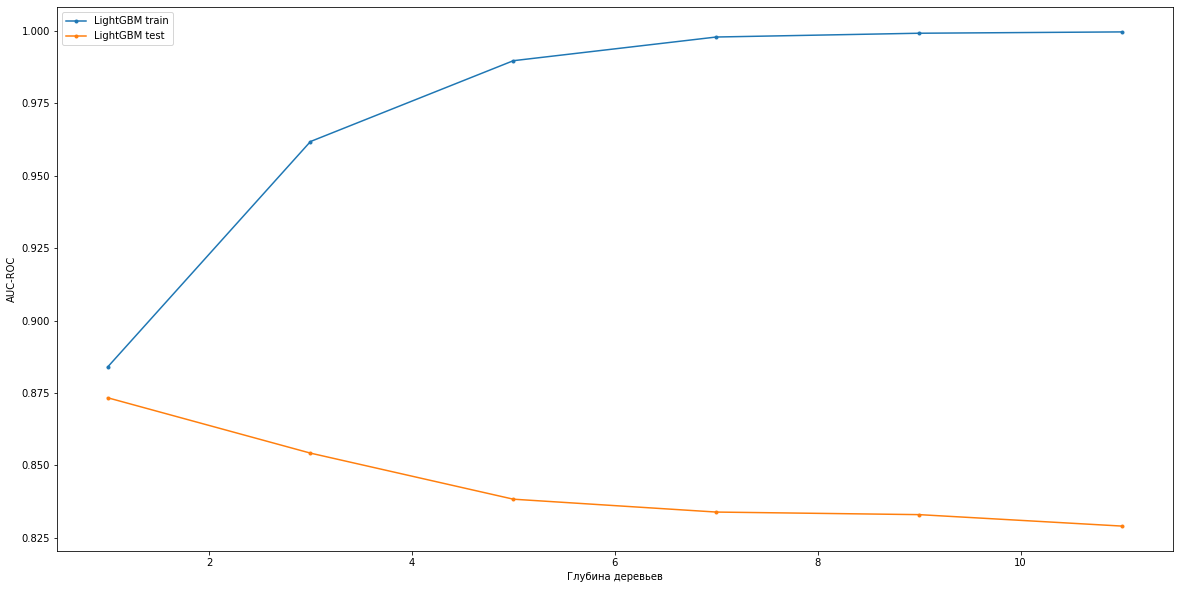

In [65]:
depth = list(range(1, 12, 2))
n_trees = 300
quals_train_lgb = []
quals_test_lgb = []

for d in depth:
    lgb = LGBMClassifier(n_estimators=n_trees, max_depth=d)
    lgb.fit(X_train, y_train)
    q_train_lgb = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1])
    q_test_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])
    
    quals_train_lgb.append(q_train_lgb)
    quals_test_lgb.append(q_test_lgb)


plt.figure(figsize=(20, 10))
plt.plot(depth, quals_train_lgb, marker='.', label='LightGBM train')
plt.plot(depth, quals_test_lgb, marker='.', label='LightGBM test')
plt.xlabel('Глубина деревьев')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

Алгоритм быстро начинает описывать тренировочную выборку достаточно точно, но быстро переобучается.

###Catboost



Попробуем теперь проделать все то же, только с CatBoost. Сравним эти две библиотеки градиентного бустинга. 

**Установка CatBoost**

Установим CatBoost.

In [66]:
! pip install catboost


**Классификация и оценка классификации данных**

Классифицируем те же искусственные данные и тем же методом оценим классификацию данной библиоткеи. 

0.8711111111111112


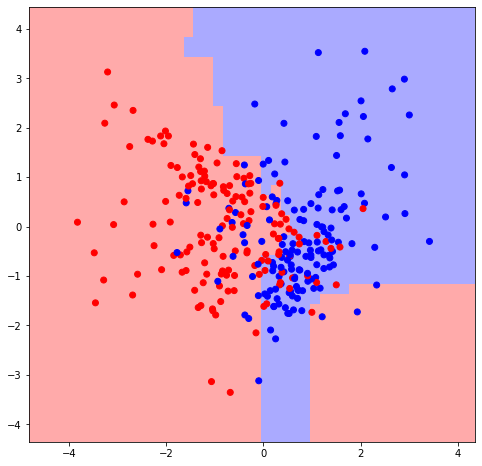

In [67]:
from catboost import CatBoostClassifier 

clf = CatBoostClassifier(iterations=300, logging_level='Silent')
clf.fit(X_train, y_train)
plot_surface(X_test, y_test, clf)

print(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Заметим, что CatBoost показывает чуть лучшее качество классификации, хоть и визуально это заметить сложно.

### Сравним оценки классификации CatBoost и LightGBM на графиках

**Подбор глубины деревьев**

Попробуем изменять глубину деревьев, не меняя их количество. Тем же методом оценим результаты.

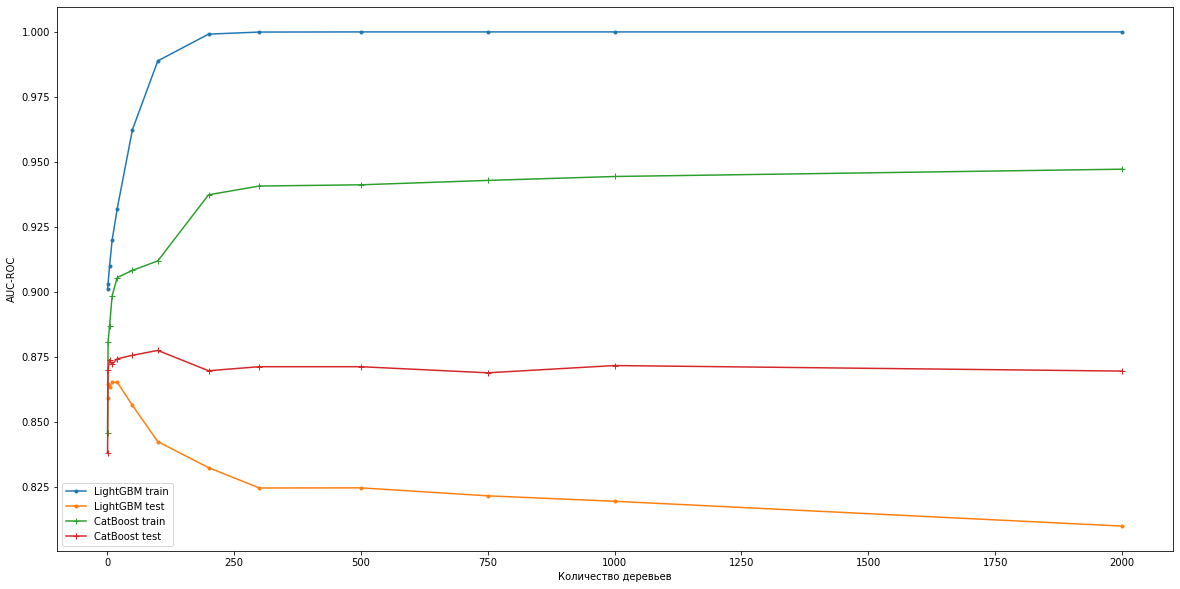

In [68]:
n_trees = [1, 2, 5, 10, 20, 50, 100, 200, 300, 500, 750, 1000, 2000]
quals_train_lgb = []
quals_test_lgb = []
quals_train_cbm = []
quals_test_cbm = []

for n in n_trees:
    lgb = LGBMClassifier(n_estimators=n)
    lgb.fit(X_train, y_train)
    q_train_lgb = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1])
    q_test_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])

    cbm = CatBoostClassifier(n_estimators=n, logging_level="Silent")
    cbm.fit(X_train, y_train)
    q_train_cbm = roc_auc_score(y_train, cbm.predict_proba(X_train)[:, 1])
    q_test_cbm = roc_auc_score(y_test, cbm.predict_proba(X_test)[:, 1])
    
    quals_train_lgb.append(q_train_lgb)
    quals_test_lgb.append(q_test_lgb)
    quals_train_cbm.append(q_train_cbm)
    quals_test_cbm.append(q_test_cbm)


plt.figure(figsize=(20, 10))
plt.plot(n_trees, quals_train_lgb, marker='.', label='LightGBM train')
plt.plot(n_trees, quals_test_lgb, marker='.', label='LightGBM test')
plt.plot(n_trees, quals_train_cbm, marker='+', label='CatBoost train')
plt.plot(n_trees, quals_test_cbm, marker='+', label='CatBoost test')
plt.xlabel('Количество деревьев')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

Заметим, что LightGBM быстрее обучается и быстрее переобучается, хоть и менее стабилен.

**Подбор глубины деревьев**

Попробуем изменять глубину деревьев, не меняя их количество. Тем же методом оценим результаты.

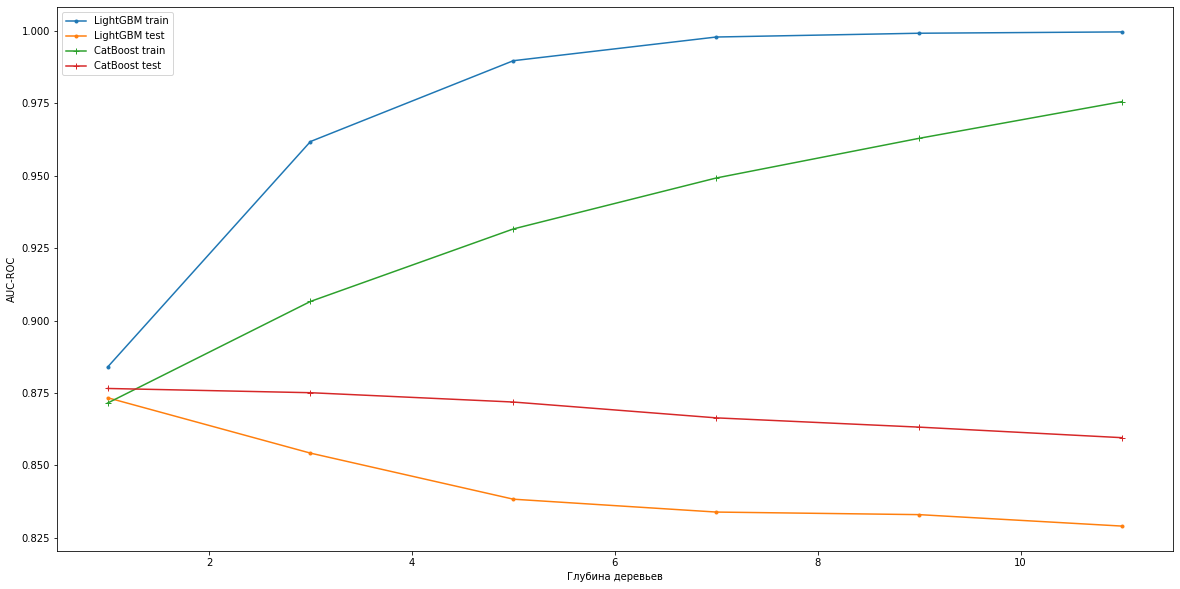

In [69]:
depth = list(range(1, 12, 2))
n_trees = 300
quals_train_lgb = []
quals_test_lgb = []
quals_train_cbm = []
quals_test_cbm = []

for d in depth:
    lgb = LGBMClassifier(n_estimators=n_trees, max_depth=d)
    lgb.fit(X_train, y_train)
    q_train_lgb = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1])
    q_test_lgb = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])

    cbm = CatBoostClassifier(n_estimators=n_trees, max_depth=d, logging_level="Silent")
    cbm.fit(X_train, y_train)
    q_train_cbm = roc_auc_score(y_train, cbm.predict_proba(X_train)[:, 1])
    q_test_cbm = roc_auc_score(y_test, cbm.predict_proba(X_test)[:, 1])
    
    quals_train_lgb.append(q_train_lgb)
    quals_test_lgb.append(q_test_lgb)
    quals_train_cbm.append(q_train_cbm)
    quals_test_cbm.append(q_test_cbm)


plt.figure(figsize=(20, 10))
plt.plot(depth, quals_train_lgb, marker='.', label='LightGBM train')
plt.plot(depth, quals_test_lgb, marker='.', label='LightGBM test')
plt.plot(depth, quals_train_cbm, marker='+', label='CatBoost train')
plt.plot(depth, quals_test_cbm, marker='+', label='CatBoost test')
plt.xlabel('Глубина деревьев')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

Аналогичные закономерности и с изменением глубины деревьев.

##Сравнение работы по классификации данных для базовых моделей и композиционной модели

**Постановка задачи.**
1. Используя набор данных с информацией о типе стекла и его химическом составе, произвести классификацию типов стекла. Для классификации типов стекла используйте мета-модель (композицию из различных моделей). Композиция должна состоять из трёх и более базовых моделей.
2. Проведите сравнительный анализ результатов композиции и базовых моделей между собой.

**Описание данных:**
1. Id number: 1 to 214 (removed from CSV file)
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
6. K: Potassium
7. Ca: Calcium
8. Ba: Barium
9. Fe: Iron
10. Type of glass: (class attribute)
-- 1 buildingwindowsfloatprocessed 
-- 2 buildingwindowsnonfloatprocessed 
-- 3 vehiclewindowsfloatprocessed
-- 4 vehiclewindowsnonfloatprocessed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

**Блок для импорта библиотек.**

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

**Препроцессинг данных.**

In [71]:
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [72]:
x = data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
y = data['Type']
StandartScaler = StandardScaler()
X = StandartScaler.fit_transform(x)

**Разделение данных на обучающую и тестовую часть.**

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

**Формирование и обучение базовых моделей.**

Логистическая регрессия с базовыми параметрами:

In [74]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
lr_predict=lr.predict(X_test)
lr_score = metrics.accuracy_score(lr_predict, y_test)
print("Классификационная оценка точности Logistic Regression:", lr_score)

Классификационная оценка точности Logistic Regression: 0.6461538461538462


Решающее дерево с базовыми параметрами

In [75]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
decision_tree_predict = decision_tree.predict(X_test)
decision_tree_score = metrics.accuracy_score(decision_tree_predict, y_test)
print("Классификационная оценка точности Decision Tree:", decision_tree_score)

Классификационная оценка точности Decision Tree: 0.6461538461538462


К ближайших соседенй с базовыми параметрами

In [76]:
k_neighbors = KNeighborsClassifier()
k_neighbors = k_neighbors.fit(X_train, y_train)
k_neighbors_predict = k_neighbors.predict(X_test)
k_neighbors_score = metrics.accuracy_score(k_neighbors_predict,y_test)
print("Классификационная оценка точности K-Neighbors:", k_neighbors_score)

Классификационная оценка точности K-Neighbors: 0.7076923076923077


**Сравнение базовых моделей.**

                Model  Accuracy
2         K-Neighbors  0.707692
0  LogisticRegression  0.646154
1        DecisionTree  0.646154


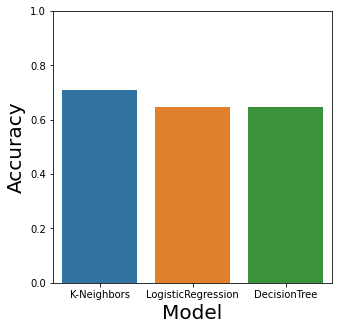

In [77]:
accuracy_models = [ ("LogisticRegression", lr_score),
                    ("DecisionTree", decision_tree_score),                   
                    ("K-Neighbors", k_neighbors_score)]

df_models= pd.DataFrame(accuracy_models,columns=["Model","Accuracy"])
df_models = df_models.sort_values(by=['Accuracy'], ascending=False)
print(df_models)

f,axes=plt.subplots(figsize=(5,5))
sns.barplot(x="Model", y="Accuracy", data= df_models,)
axes.set_xlabel("Model", size=20)
axes.set_ylabel("Accuracy", size=20)
axes.set_ylim(0,1.0)
plt.show()

**Формирование и обучение композиции базовых моеделй с помощью LightGBM.**

**LightGBM**

In [78]:
sizes = [1, 2, 5, 10, 20, 50, 100, 200, 300, 500, 750, 1000, 2000]
accuracy_lightgbm = {}
LGBM_accuracy = []
for size in sizes:
  LGBM = LGBMClassifier(n_estimators=size).fit(X_train, y_train)
  LGBM_predict = LGBM.predict(X_test)
  LGBM_score = metrics.accuracy_score(LGBM_predict,y_test)
  LGBM_accuracy.append(LGBM_score)
  accuracy_lightgbm[size] = LGBM_score

best_LGBM_score = max(LGBM_accuracy)
#print('accuracy:\n', accuracy_lightgbm) 
print('Классификационная оценка точности LightGBM:\n', best_LGBM_score)

Классификационная оценка точности LightGBM:
 0.7384615384615385


**Cравнительный анализ результатов композиции и базовых моделей между собой.**

                Model  Accuracy
3            LightGBM  0.738462
2         K-Neighbors  0.707692
0  LogisticRegression  0.646154
1        DecisionTree  0.646154


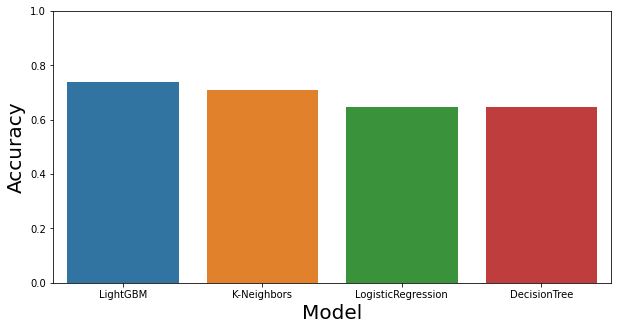

In [79]:
accuracy_models_with_rf = [ ("LogisticRegression", lr_score),
                          ("DecisionTree", decision_tree_score),                   
                          ("K-Neighbors", k_neighbors_score),
                          ("LightGBM", best_LGBM_score)]

df_models_with_rf= pd.DataFrame(accuracy_models_with_rf,columns=["Model","Accuracy"])
df_models_with_rf = df_models_with_rf.sort_values(by=['Accuracy'], ascending=False)
print(df_models_with_rf)

f,axes=plt.subplots(figsize=(10,5))
sns.barplot(x="Model", y="Accuracy", data= df_models_with_rf,)
axes.set_xlabel("Model", size=20)
axes.set_ylabel("Accuracy", size=20)
axes.set_ylim(0,1.0)
plt.show()

**Вывод**: Композиционный метод классификации имеt большую, чем базовые модели, классификационную оценку точности (Accuracy). 

# Полезные ссылки

Статьи с теорией:

1)https://habr.com/ru/company/skillfactory/blog/530594/

2)https://en.wikipedia.org/wiki/LightGBM

3)https://pythonru.com/biblioteki/lightgbm

4)https://www.machinelearningmastery.ru/lightgbm-vs-xgboost-which-algorithm-win-the-race-1ff7dd4917d/

5)https://russianblogs.com/article/6403728054/

6)https://habr.com/ru/company/ods/blog/327250/

Курс по машинному обучения, в котором рассказывается про бустинг, в том числе и про библиотеки, среди которых LightGBM: https://www.coursera.org/learn/advanced-machine-learning-methods/home/welcome

